In [156]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D

In [129]:
RANDOM_SEED = 42
AMOUNT_POINTS = 1500

In [130]:
def PLA(w: np.ndarray[np.float16], x: np.ndarray[np.float16], label: int, lr: float) -> np.ndarray[np.float16]:
    if label == 0:
        if np.dot(w, x) < 0:
            return w
        return w + lr * (-1) * x
    else:
        if np.dot(w, x) > 0:
            return w
        return w + lr * x

In [139]:
def generate_linear_separable_data(n_points=100, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Random coefficients for the line: ax + by + c = 0
    a, b = np.random.uniform(-1, 1, 2)

    # Generate random points
    X = np.random.uniform(-1, 1, (n_points, 2))

    # Assign labels based on the line equation
    # Label = 1 if ax + by + c > 0, else 0
    y = (a * X[:, 0] + b * X[:, 1] > 0).astype(int)

    return X, y, (a, b)

# Generate the dataset
X, y, line_params = generate_linear_separable_data(n_points=AMOUNT_POINTS, seed=RANDOM_SEED)

In [146]:
def generate_linear_separable_3d_data(n_points=100, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Random coefficients for the plane: ax + by + cz = 0
    a, b, c = np.random.uniform(-1, 1, 3)

    # Generate random 3D points
    X = np.random.uniform(-10, 10, (n_points, 3))

    # Assign labels based on the plane equation
    # Label = 1 if ax + by + cz > 0, else 0
    y = (a * X[:, 0] + b * X[:, 1] + c * X[:, 2] > 0).astype(int)

    return X, y, (a, b, c)

X, y, line_params = generate_linear_separable_3d_data(n_points=AMOUNT_POINTS, seed=RANDOM_SEED)

In [147]:
line_params

(-0.250919762305275, 0.9014286128198323, 0.4639878836228102)

In [150]:
w = np.array([1. for _ in range(X.shape[1])], dtype=np.float16)

In [151]:
def test_results(w, X, Y):
    for i in range(Y.shape[0]):
        if np.dot(w, X[i]) < 0 and Y[i] == 1:
            return False
        if np.dot(w, X[i]) > 0 and Y[i] == 0:
            return False
    return True

In [152]:
def get_accuracy(w, X, Y):
    correct = 0
    false = 0
    
    for i in range(Y.shape[0]):
        if np.dot(w, X[i]) < 0 and Y[i] == 1:
            false += 1
        elif np.dot(w, X[i]) > 0 and Y[i] == 0:
            false += 1
        else:
            correct += 1
    return correct / (false + correct)

In [153]:
base_w = w
amounts = []

for i in trange(1, 300):
    idx = 0
    lr = i / 100

    while not test_results(w, X, y):
        for j in range(y.shape[0]):
            w = PLA(w, X[j], y[j], lr)
        idx += 1
        if idx >= 300:
            break
    w = base_w
    amounts.append(idx)

100%|██████████| 299/299 [00:13<00:00, 21.38it/s]


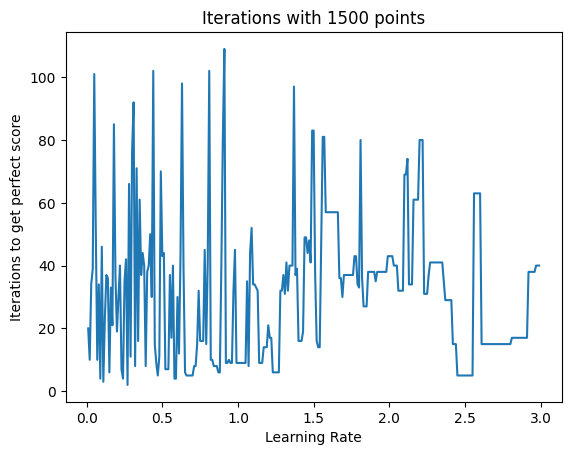

In [155]:
plt.plot([i/100 for i in range(1, 300)], amounts)
plt.ylabel("Iterations to get perfect score")
plt.xlabel("Learning Rate")
plt.title(f"Iterations with {AMOUNT_POINTS} points")
plt.show()

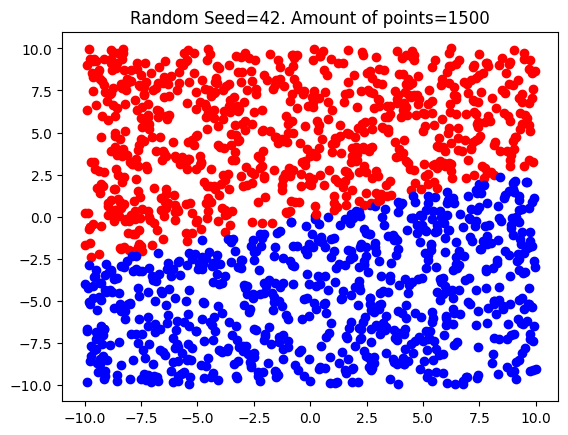

In [137]:
fig, ax = plt.subplots()

for (idx, point) in enumerate(X):
    ax.scatter(point[0], point[1], color=('blue' if y[idx] == 0 else 'red'))
plt.title(f"Random Seed={RANDOM_SEED}. Amount of points={AMOUNT_POINTS}")
plt.show()

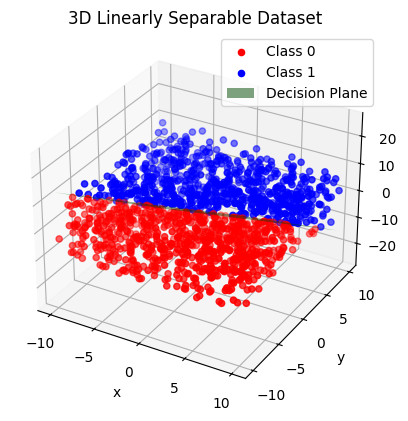

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points for each class
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

# Plot the decision plane
a, b, c = line_params
x_vals = np.linspace(-10, 10, 10)
y_vals = np.linspace(-10, 10, 10)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
Z_vals = -(a * X_vals + b * Y_vals) / c  # Plane equation: z = -(ax + by) / c
ax.plot_surface(X_vals, Y_vals, Z_vals, alpha=0.5, color='green', label='Decision Plane')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Linearly Separable Dataset')
plt.legend()
plt.show()